In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
traindf = pd.read_csv('Titanic_train.csv')
testdf = pd.read_csv('Titanic_test.csv')

In [3]:
traindf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
testdf

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
traindf.duplicated().sum()

0

In [6]:
traindf.drop('Name', axis = 1, inplace= True)


In [7]:
testdf.drop('Name', axis = 1, inplace= True)

In [8]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [9]:
# Cabin column has too many missing values. so we will drop this column. also ticket number , PassengerId is not required.

In [10]:
traindf.drop(['Cabin','PassengerId','Ticket'], axis = 1, inplace = True)

In [11]:
testdf.drop(['Cabin','PassengerId','Ticket'], axis = 1, inplace = True)

In [12]:
traindf.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [13]:
traindf.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Figure size 3000x2000 with 0 Axes>

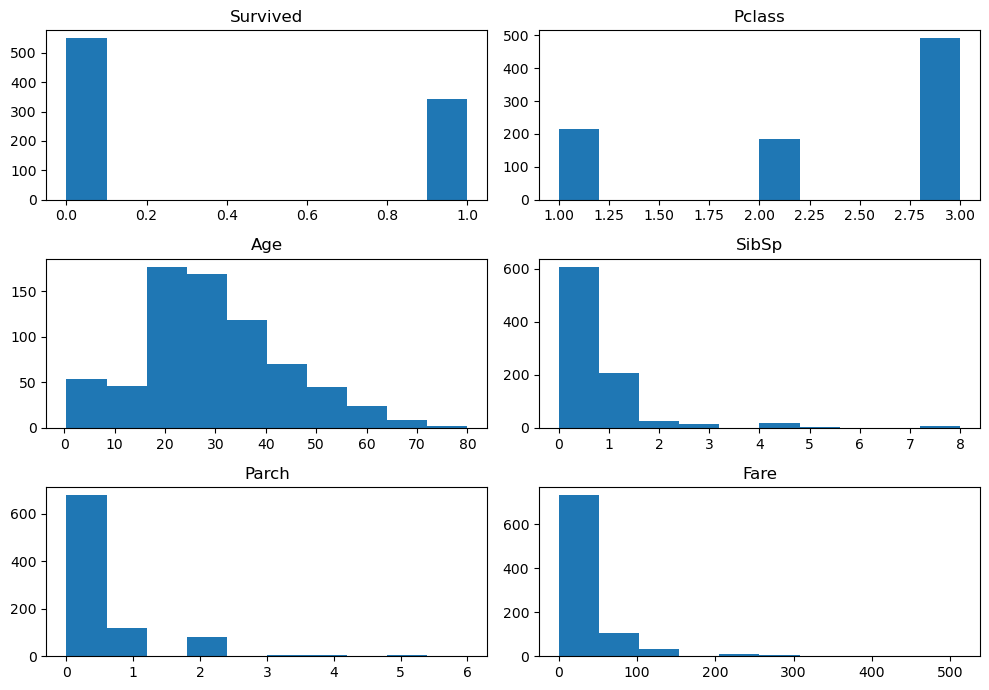

In [14]:
plt.figure(figsize = (30,20))
traindf.hist(figsize = (10,7), grid = False)
plt.tight_layout()
plt.show()


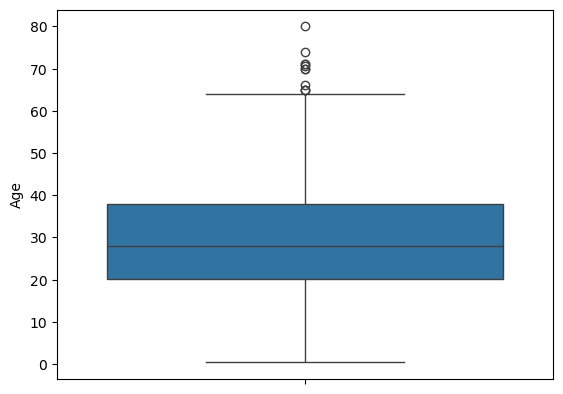

In [15]:
a = ['Survived','Pclass','Age','SibSp','Parch','Fare']
sns.boxplot(traindf['Age'])
plt.show()

In [16]:
# handling missing values in Age column
traindf['Age'] = traindf['Age'].fillna(traindf['Age'].median())

In [17]:
traindf['Age'].isna().sum()

0

In [18]:
traindf['Embarked'].isnull().sum()

2

In [19]:
# handling missing values in Embarked column.
traindf['Embarked'] = traindf['Embarked'].fillna(traindf['Embarked'].mode()[0])

In [20]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [21]:
#for testing dataset
testdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [22]:
testdf['Age'] = testdf['Age'].fillna(testdf['Age'].median())
testdf = testdf.dropna(subset= 'Fare')

In [23]:
testdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 417 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    417 non-null    int64  
 1   Sex       417 non-null    object 
 2   Age       417 non-null    float64
 3   SibSp     417 non-null    int64  
 4   Parch     417 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  417 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 26.1+ KB


In [24]:
#Converting categorical columns to numerical columns.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
traindf['Sex'] = le.fit_transform(traindf['Sex'])

In [25]:
traindf['Embarked']= le.fit_transform(traindf['Embarked'])
testdf['Sex'] = le.fit_transform(testdf['Sex'])
testdf['Embarked'] = le.fit_transform(testdf['Embarked'])

C:\Users\ASHISH\AppData\Local\Temp\ipykernel_16216\2010123486.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf['Sex'] = le.fit_transform(testdf['Sex'])
C:\Users\ASHISH\AppData\Local\Temp\ipykernel_16216\2010123486.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf['Embarked'] = le.fit_transform(testdf['Embarked'])


In [26]:
traindf.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [27]:
traindf.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.064910,-0.035322,0.081629,0.257307,-0.167675
Pclass,-0.338481,1.000000,0.131900,-0.339898,0.083081,0.018443,-0.549500,0.162098
Sex,-0.543351,0.131900,1.000000,0.081163,-0.114631,-0.245489,-0.182333,0.108262
Age,-0.064910,-0.339898,0.081163,1.000000,-0.233296,-0.172482,0.096688,-0.018754
SibSp,-0.035322,0.083081,-0.114631,-0.233296,1.000000,0.414838,0.159651,0.068230
Parch,0.081629,0.018443,-0.245489,-0.172482,0.414838,1.000000,0.216225,0.039798
Fare,0.257307,-0.549500,-0.182333,0.096688,0.159651,0.216225,1.000000,-0.224719
Embarked,-0.167675,0.162098,0.108262,-0.018754,0.068230,0.039798,-0.224719,1.000000


In [28]:
x = traindf.iloc[:, 1:]
y= traindf.iloc[:,0]

In [29]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model = lr.fit(x,y)

C:\Users\ASHISH\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
ypred = model.predict(x)

In [31]:
from sklearn.metrics import classification_report , confusion_matrix

In [32]:
confusion_matrix(y,ypred)

array([[474,  75],
       [103, 239]], dtype=int64)

In [33]:
model.score(x,y)

0.8002244668911336

In [34]:
print(classification_report(y,ypred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       549
           1       0.76      0.70      0.73       342

    accuracy                           0.80       891
   macro avg       0.79      0.78      0.79       891
weighted avg       0.80      0.80      0.80       891



In [35]:
#accuracy = 80%
#recall = 86%
#f1-score = 84%
#precision= 82%

In [36]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y, ypred)
from sklearn.metrics import roc_curve
fpr, tpr, threshold = roc_curve(y, model.predict_proba(x)[:,1])


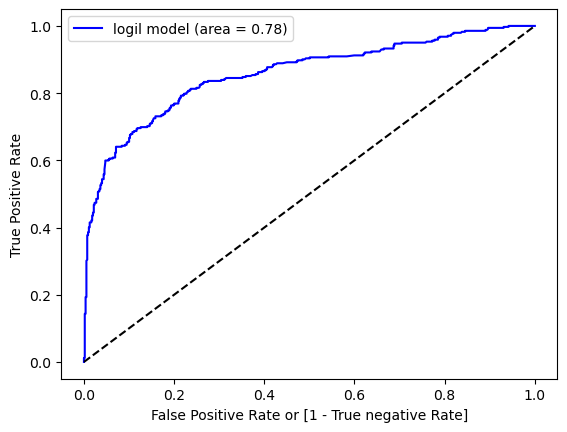

In [37]:
plt.plot(fpr, tpr,color = 'blue', label = 'logil model (area = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1 - True negative Rate]')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [38]:
model.coef_
#Positive coefficients indicate an increase in the feature value leads to higher odds of survival, while negative coefficients indicate the opposite.

array([[-1.05016612e+00, -2.63080163e+00, -3.80293388e-02,
        -3.15827777e-01, -8.49030687e-02,  2.15853728e-03,
        -2.13856476e-01]])

Age: Older passengers might have lower survival odds due to priority given to younger individuals during evacuation.
Sex: Females historically had higher survival rates due to the "women and children first" policy.
Ticket Class (Pclass): Higher classes might correlate with higher survival rates due to closer proximity to lifeboats.
Family Size (SibSp, Parch): Small families or individuals might have had higher survival chances due to easier navigation and boarding.

In [40]:
#b. Discuss the significance of features in predicting the target variable (survival probability in this case).
import statsmodels.api as sm
sm.Logit(y,x).fit().summary()

Optimization terminated successfully.
         Current function value: 0.495734
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      884
Method:                           MLE   Df Model:                            6
Date:                Mon, 07 Oct 2024   Pseudo R-squ.:                  0.2556
Time:                        11:26:28   Log-Likelihood:                -441.70
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 1.640e-62
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Pclass         0.0480      0.079      0.608      0.543      -0.107       0.203
Sex           -2.2772      0.179    -12.706      0.000      -2.628      -1.926
Age            0.0047      0.006      0.813      0.416      -0.007       0.016
SibSp         -0.2944      0.095     -3.099      0.002      -0.481      -0.108
Parch         -0.1172      0.112     -1.051      0.293      -0.336       0.101
Fare           0.0184      0.003      6.070      0.000       0.012       0.024
Embarked       0.1203      0.106      1.139      0.255      -0.087       0.327
==============================================================================
"""

In [41]:
## taking the l.o.s as 0.05 the significant columns in the prediction of survival rate are Sex, SibSp and Fare

In [42]:
## predicting survival rate for test dataset
model.predict(testdf)

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [43]:
testdf['survived'] = model.predict(testdf)

C:\Users\ASHISH\AppData\Local\Temp\ipykernel_16216\1856810621.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf['survived'] = model.predict(testdf)


In [44]:
testdf.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,survived
0,3,1,34.5,0,0,7.8292,1,0
1,3,0,47.0,1,0,7.0000,2,0
2,2,1,62.0,0,0,9.6875,1,0
3,3,1,27.0,0,0,8.6625,2,0
4,3,0,22.0,1,1,12.2875,2,1


In [45]:
import pickle 
from pickle import dump

In [46]:
with open('logreg_model.pkl', 'wb') as file:
    pickle.dump(model, file)

## interview questions:

### 1. **What is the difference between precision and recall?**

- **Precision**: Measures the accuracy of positive predictions. It is the ratio of correctly predicted positive observations to the total predicted positives.
  ### Precision = True Positives/True Positives + False Positives
  - High precision means fewer false positives.

- **Recall**: Measures the ability to identify all actual positives. It is the ratio of correctly predicted positive observations to all actual positives.
  ### Recall = True Positives/True Positives + False Positives
  - High recall means fewer false negatives.

Precision focuses on **correctness**, while recall focuses on **completeness** of positive predictions.

---

### 2. **What is cross-validation, and why is it important in binary classification?**

- **Cross-validation** is a technique used to evaluate a model's performance by splitting the dataset into multiple subsets (folds). The model is trained on some folds and tested on the remaining ones. This process is repeated multiple times (usually 5 or 10 folds), and the results are averaged to get a more reliable estimate of the model's performance.

- **Importance in binary classification**: Cross-validation helps prevent overfitting by ensuring that the model generalizes well to unseen data. It provides a more robust evaluation compared to a single train-test split, especially when dealing with limited or imbalanced datasets in binary classification.